In [ ]:
!pip install spacy
!python -m spacy download en_core_web_trf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 893.8 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd

df = pd.read_csv("./data/review_for_amazon.csv")
df.head()

,name,n_review,country,comment,rating,date
0,Graham MOORE,21,GB,Uncaring and incompetent\r\n\r\n\r\n\r\nImposs...,1,2022-06-20
1,popadog,5,GB,Amazon maybe the quickest way to get<U+0085>\r...,2,2022-06-20
2,Andrew Torok,6,US,Not fair!\r\n\r\n\r\n\r\nIn genera! I am an Am...,1,2022-06-20
3,Jerry Jocoy,15,US,Amazon Prime is crap\r\n\r\n\r\n\r\nAmazon Pri...,1,2022-06-20
4,steve erickson,3,US,Terrible delivery services\r\n\r\n\r\n\r\nTerr...,1,2022-06-19


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spacy

nlp = spacy.load("en_core_web_trf")   # meilleur modèle pour les reviews


In [ ]:
import pandas as pd
import re
import numpy as np
# Load the data with the working encoding
df = pd.read_csv("./data/review_for_amazon.csv", encoding="latin-1")
print("Original data shape:", df.shape)
print("Original columns:", df.columns.tolist())
print("\nOriginal data info:")
print(df.info())
print("\nMissing values before cleaning:")
print(df.isnull().sum())
# 1. Clean NAME column
def clean_name(name):
    if pd.isna(name):
        return "Unknown Reviewer"
    if isinstance(name, str):
        # Remove extra whitespace
        name = re.sub(r'\s+', ' ', name).strip()
        # Proper title case (handle names like "McDonald", "O'Neil")
        name = name.title()
        # Remove any special characters except spaces, hyphens, apostrophes
        name = re.sub(r'[^a-zA-Z\s\-\']', '', name)
        # Ensure it's not empty after cleaning
        if not name:
            return "Unknown Reviewer"
        return name
    return "Unknown Reviewer"
# 2. Clean N_REVIEW column
def clean_n_review(n_review):
    if pd.isna(n_review):
        return 0

Original data shape: (12948, 6)
Original columns: ['name', 'n_review', 'country', 'comment', 'rating', 'date']

Original data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948 entries, 0 to 12947
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      12948 non-null  object
 1   n_review  12948 non-null  int64 
 2   country   12947 non-null  object
 3   comment   12948 non-null  object
 4   rating    12948 non-null  int64 
 5   date      12948 non-null  object
dtypes: int64(2), object(4)
memory usage: 607.1+ KB
None

Missing values before cleaning:
name        0
n_review    0
country     1
comment     0
rating      0
date        0
dtype: int64


In [66]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()                                # mettre en minuscule
    text = re.sub(r"\s+", " ", text)                   # enlever espaces multiples
    text = re.sub(r"http\S+|www\S+", "", text)         # enlever URLs
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)     # enlever caractères spéciaux
    text = emoji.replace_emoji(text, "")                 # enlever emojis
    text = text.strip()
    return text

In [67]:
data = df[:100]
data.reset_index()
data.shape

(100, 7)

In [68]:
all_entities = []

for text in data["comment"].astype(str):
    doc = nlp(text)
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.append(ents)

data["entities"] = all_entities

/tmp/ipython-input-4086457032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["entities"] = all_entities


In [69]:
data["entities"] = all_entities
data.head()


/tmp/ipython-input-2613212891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["entities"] = all_entities


,name,n_review,country,comment,rating,date,clean_comment,entities
0,Graham MOORE,21,GB,Uncaring and incompetent\r\n\r\n\r\n\r\nImposs...,1,2022-06-20,uncaring and incompetent impossible to deal wi...,"[(Amazon, ORG), (Amazon, ORG), (Amazon, ORG)]"
1,popadog,5,GB,Amazon maybe the quickest way to get<U+0085>\r...,2,2022-06-20,amazon maybe the quickest way to getu0085 amaz...,"[(Amazon, ORG), (Amazon, ORG), (Amazon, ORG), ..."
2,Andrew Torok,6,US,Not fair!\r\n\r\n\r\n\r\nIn genera! I am an Am...,1,2022-06-20,not fair! in genera! i am an amazon junkie. i ...,"[(Amazon, ORG), (day, DATE), (one, CARDINAL), ..."
3,Jerry Jocoy,15,US,Amazon Prime is crap\r\n\r\n\r\n\r\nAmazon Pri...,1,2022-06-20,amazon prime is crap amazon prime is crap firs...,"[(Amazon, ORG), (Amazon, ORG), (first, ORDINAL..."
4,steve erickson,3,US,Terrible delivery services\r\n\r\n\r\n\r\nTerr...,1,2022-06-19,terrible delivery services terrible delivery s...,"[(95%, PERCENT)]"


In [73]:
def apply_cleaning(df, text_col="comment"):
    df = df.copy()
    df[text_col] = df[text_col].astype(str).fillna("")

    df["clean_text"] = df[text_col].apply(clean_text)

    df = df[df["clean_text"].str.len() > 3].reset_index(drop=True)
    return df


In [74]:
def extract_entities(df, text_col="clean_text"):
    all_entities = []

    for doc in nlp.pipe(df[text_col], batch_size=50, n_process=2):
        ents = [(ent.text, ent.label_) for ent in doc.ents]
        all_entities.append(ents)

    df["entities"] = all_entities
    return df


In [75]:
def spacy_pipeline(df, comment_col="comment"):
    print("🔧 Étape 1 : Nettoyage du texte…")
    df = apply_cleaning(df, comment_col)

    print("🧠 Étape 2 : Extraction des entités (NER)…")
    df = extract_entities(df, "clean_text")

    print("✅ Pipeline terminé !")
    return df


In [77]:
!pip install spacy
!python -m spacy download en_core_web_trf

import pandas as pd
import re
import emoji
import spacy

# Monter le drive (Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Charger le modèle spacy
nlp = spacy.load("en_core_web_trf")

# Charger le dataset avec l'encodage correct
df = pd.read_csv("./data/review_for_amazon.csv", encoding="latin-1")
print("Original data shape:", df.shape)
print("Original columns:", df.columns.tolist())
print(df.info())
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fonctions de nettoyage
def clean_name(name):
    if pd.isna(name):
        return "Unknown Reviewer"
    if isinstance(name, str):
        name = re.sub(r'\s+', ' ', name).strip()
        name = name.title()
        name = re.sub(r'[^a-zA-Z\s\-\']', '', name)
        if not name:
            return "Unknown Reviewer"
        return name
    return "Unknown Reviewer"

def clean_n_review(n_review):
    if pd.isna(n_review):
        return 0
    try:
        return int(n_review)
    except:
        return 0

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)
    text = emoji.replace_emoji(text, "")
    text = text.strip()
    return text

# Appliquer le nettoyage sur le texte
def apply_cleaning(df, text_col="comment"):
    df = df.copy()
    df[text_col] = df[text_col].astype(str).fillna("")
    df["clean_text"] = df[text_col].apply(clean_text)
    df = df[df["clean_text"].str.len() > 3].reset_index(drop=True)
    return df

# Extraction des entités avec spacy
def extract_entities(df, text_col="clean_text"):
    all_entities = []
    for doc in nlp.pipe(df[text_col], batch_size=50, n_process=2):
        ents = [(ent.text, ent.label_) for ent in doc.ents]
        all_entities.append(ents)
    df["entities"] = all_entities
    return df

# Pipeline complet
def spacy_pipeline(df, comment_col="comment"):
    print("🔧 Étape 1 : Nettoyage du texte…")
    df = apply_cleaning(df, comment_col)
    print("🧠 Étape 2 : Extraction des entités (NER)…")
    df = extract_entities(df, "clean_text")
    print("✅ Pipeline terminé !")
    return df

# Optionnel : échantillon pour test
data = df[:100].copy()

# Appliquer le pipeline
data = spacy_pipeline(data)

# Afficher un aperçu
print(data.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original data shape: (12948, 6)
Original columns: ['name', 'n_review', 'country', 'comment', 'rating', 'date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948 entries, 0 to 12947
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      12948 non-null  object
 1   n_review  12948 non-null  int64 
 2   country   12947 non-null  object
 3   comment   12948 non-null  object
 4   r

In [87]:
def remove_duplicate_entities(df, entities_col="entities"):
    def unique_entities(ents):
        seen = set()
        unique_ents = []
        for ent in ents:
            if ent not in seen:
                unique_ents.append(ent)
                seen.add(ent)
        return unique_ents

    df[entities_col] = df[entities_col].apply(unique_entities)
    return df


In [88]:
data = remove_duplicate_entities(data, "entities")
print(data[["clean_text", "entities"]].head())


                                          clean_text  \
0  uncaring and incompetent impossible to deal wi...   
1  amazon maybe the quickest way to getu0085 amaz...   
2  not fair! in genera! i am an amazon junkie. i ...   
3  amazon prime is crap amazon prime is crap firs...   
4  terrible delivery services terrible delivery s...   

                                            entities  
0           [(an echo show, PRODUCT), (amazon, ORG)]  
1  [(amazon, ORG), (t, ORG), (amazonu0092s, ORG),...  
2    [(genera, GPE), (amazon, ORG), (one, CARDINAL)]  
3  [(amazon, ORG), (prime, PRODUCT), (first, ORDI...  
4                   [(presice, ORG), (95, CARDINAL)]  


In [89]:
from collections import Counter
import pandas as pd

# Récupérer toutes les entités extraites dans une liste plate
all_ents = [ent for sublist in data["entities"] for ent, label in sublist]

# Compter la fréquence des entités (en ignorant la casse)
counter_ents = Counter([ent.lower() for ent in all_ents])

# Convertir en DataFrame pour affichage plus clair
df_ents_freq = pd.DataFrame(counter_ents.items(), columns=["Entity", "Frequency"])
df_ents_freq = df_ents_freq.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
# compter la fréquece des entités extraites
print(df_ents_freq.head(20))


              Entity  Frequency
0             amazon         69
1              today         12
2                one          8
3                two          8
4              first          7
5              prime          6
6           tomorrow          5
7           next day          5
8           itu0092s          4
9       the next day          4
10              ebay          4
11                 2          4
12            second          4
13           english          3
14            monday          3
15            u00a35          3
16                 3          3
17           two day          3
18  customer service          3
19           kaza uk          2


In [81]:
# Récupérer toutes les entités avec leur label
all_ents_labels = [label for sublist in data["entities"] for ent, label in sublist]

counter_labels = Counter(all_ents_labels)

df_labels_freq = pd.DataFrame(counter_labels.items(), columns=["Entity_Type", "Frequency"]).sort_values(by="Frequency", ascending=False)
print(df_labels_freq)


   Entity_Type  Frequency
1          ORG        266
5         DATE        159
0      PRODUCT         61
3     CARDINAL         61
10      PERSON         35
6         TIME         34
12       MONEY         22
2          GPE         19
4      ORDINAL         13
8     QUANTITY          8
11        NORP          5
7     LANGUAGE          3
9          LOC          2
13         LAW          1


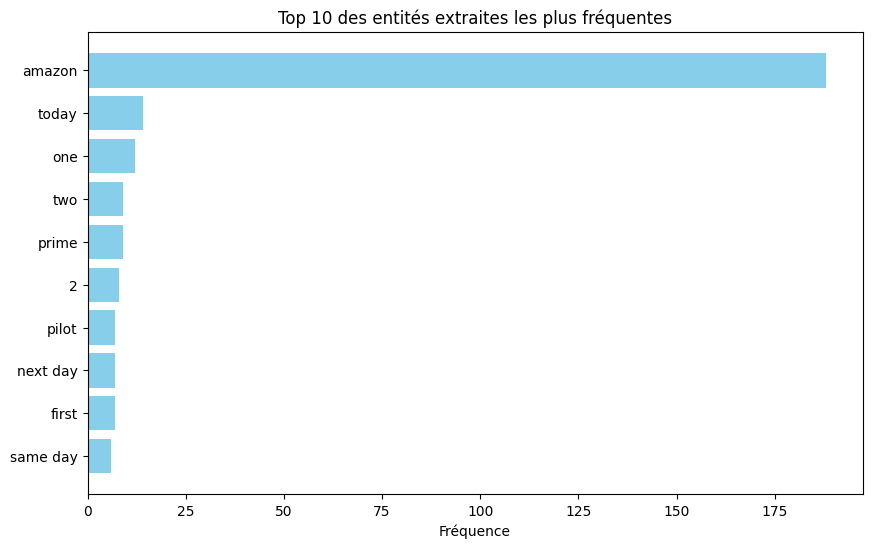

In [82]:
import matplotlib.pyplot as plt

top_10 = df_ents_freq.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10["Entity"][::-1], top_10["Frequency"][::-1], color='skyblue')
plt.xlabel("Fréquence")
plt.title("Top 10 des entités extraites les plus fréquentes")
plt.show()


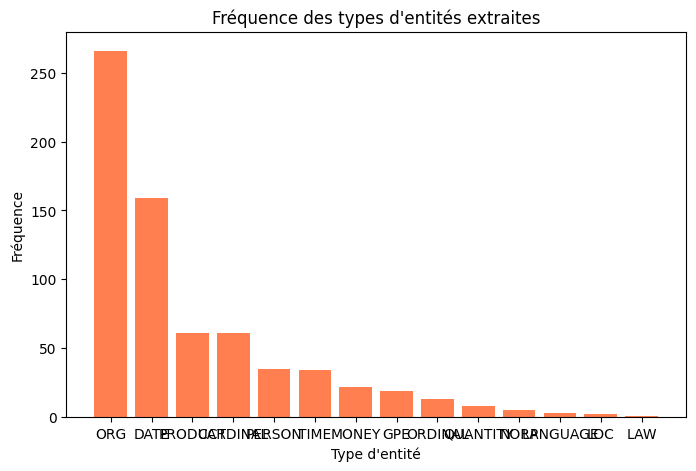

In [83]:
plt.figure(figsize=(8,5))
plt.bar(df_labels_freq["Entity_Type"], df_labels_freq["Frequency"], color='coral')
plt.xlabel("Type d'entité")
plt.ylabel("Fréquence")
plt.title("Fréquence des types d'entités extraites")
plt.show()


In [84]:
import plotly.express as px

top_20 = df_ents_freq.head(20)

fig = px.bar(top_20, x="Frequency", y="Entity", orientation='h',
             title="Top 20 des entités extraites les plus fréquentes",
             labels={"Frequency": "Fréquence", "Entity": "Entité"},
             height=600)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [90]:
import pandas as pd
import re
import emoji
import spacy

# Charger le modèle spaCy transformer
nlp = spacy.load("en_core_web_trf")

# Nettoyage complet du texte
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)
    text = emoji.replace_emoji(text, "")
    text = text.strip()
    return text

def apply_cleaning(df, text_col="comment"):
    df = df.copy()
    df[text_col] = df[text_col].astype(str).fillna("")
    df["clean_text"] = df[text_col].apply(clean_text)
    df = df[df["clean_text"].str.len() > 3].reset_index(drop=True)
    return df

# Extraction des entités (NER)
def extract_entities(df, text_col="clean_text"):
    all_entities = []
    for doc in nlp.pipe(df[text_col], batch_size=50, n_process=2):
        ents = [(ent.text, ent.label_) for ent in doc.ents]
        all_entities.append(ents)
    df["entities"] = all_entities
    return df

# Suppression des entités dupliquées dans une review
def remove_duplicate_entities(df, entities_col="entities"):
    def unique_entities(ents):
        seen = set()
        unique_ents = []
        for ent in ents:
            if ent not in seen:
                unique_ents.append(ent)
                seen.add(ent)
        return unique_ents

    df[entities_col] = df[entities_col].apply(unique_entities)
    return df

# Filtrage des entités selon leur label
keep_labels = {"PERSON", "ORG", "GPE", "LOC"}  # Modifier selon besoins

def filter_entities(df, entities_col="entities", keep_labels=keep_labels):
    def filter_fn(ents):
        return [ent for ent in ents if ent[1] in keep_labels]
    df[entities_col] = df[entities_col].apply(filter_fn)
    return df

# Pipeline complet
def spacy_pipeline(df, comment_col="comment"):
    print("🔧 Étape 1 : Nettoyage du texte…")
    df = apply_cleaning(df, comment_col)

    print("🧠 Étape 2 : Extraction des entités (NER)…")
    df = extract_entities(df, "clean_text")

    print("🧹 Étape 3 : Suppression des entités dupliquées…")
    df = remove_duplicate_entities(df, "entities")

    print("⚙️ Étape 4 : Filtrage des entités non significatives…")
    df = filter_entities(df, "entities")

    print("✅ Pipeline terminé !")
    return df

# Exemple d’utilisation
df = pd.read_csv("./data/review_for_amazon.csv", encoding="latin-1")

# Prendre un échantillon pour test (optionnel)
data_sample = df[:100].copy()

# Appliquer le pipeline complet
data_processed = spacy_pipeline(data_sample)

# Afficher un aperçu
print(data_processed[["clean_text", "entities"]].head())


🔧 Étape 1 : Nettoyage du texte…
🧠 Étape 2 : Extraction des entités (NER)…
🧹 Étape 3 : Suppression des entités dupliquées…
⚙️ Étape 4 : Filtrage des entités non significatives…
✅ Pipeline terminé !
                                          clean_text  \
0  uncaring and incompetent impossible to deal wi...   
1  amazon maybe the quickest way to getu0085 amaz...   
2  not fair! in genera! i am an amazon junkie. i ...   
3  amazon prime is crap amazon prime is crap firs...   
4  terrible delivery services terrible delivery s...   

                                            entities  
0                                    [(amazon, ORG)]  
1  [(amazon, ORG), (t, ORG), (amazonu0092s, ORG),...  
2                     [(genera, GPE), (amazon, ORG)]  
3                                    [(amazon, ORG)]  
4                                   [(presice, ORG)]  
